# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

We aim to build a predictive model that estimates the price of a used car based on the most important attributes that impact price, e.g odometer reading, year, make, model, condition, and location. The target variable price is a continuous value making this a supervised regression problem. We will perform an analysis on feature importance to identify which factors most influence used car prices, enabling data-driven recommendations for dealership pricing strategies and inventory decisions.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

One of the first steps involves handling **missing data**, which can appear in various forms such as null values in fields like `drive` and `size`. Decisions must be made on whether to **impute** these values—using techniques like filling with mode, median, or a placeholder—or to **drop** rows or columns entirely, particularly if the missingness is extensive or random. Additionally, **duplicate data** should be checked and removed to avoid overrepresenting certain observations. This includes not only exact row duplicates but also more subtle issues like **repeated VINs**, which may indicate duplicated or re-listed vehicles.

Another key aspect of data quality is identifying **outliers** and **invalid values**. Outlier detection, particularly in `price`, helps remove anomalies that could skew analysis and models. It’s also important to filter out **invalid entries** such as `NaN`, infinite values, or logically incorrect data (e.g., prices equal to zero, or `year` values in the future). Proper **data type conversion** is equally essential—`year` should be an integer to allow calculations like vehicle age, and categorical fields like `cylinders` should be cleaned and encoded appropriately. The **VIN** column should also be validated for uniqueness if it’s being used as an identifier rather than a feature.

Once the data is clean, **Exploratory Data Analysis (EDA)** provides a foundational understanding of structure and relationships within the dataset. **Univariate analysis** focuses on individual columns to examine their distribution, spread, and data quality. **Bivariate analysis**, on the other hand, explores relationships between features—especially how various attributes (like condition, year, or odometer) correlate with **price**, which is typically the target variable. Both **graphical and numerical summaries** can be used to evaluate correlations, trends, and potential feature importance, setting the stage for informed feature engineering and model selection.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [1270]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [1271]:
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [1272]:
# first 5 rows are producing alot of NaN, check out another sample of 5 rows
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
421463,7306184580,madison,15888,2016.000,chevrolet,equinox,NaN,6 cylinders,gas,83359.000,clean,automatic,2GNFLGE30G6254166,4wd,NaN,SUV,black,wi
130400,7313560438,hawaii,1600,2006.000,ford,focus se hatchback,good,4 cylinders,gas,75000.000,clean,manual,NaN,fwd,compact,hatchback,grey,hi
286792,7314004418,akron / canton,19000,2016.000,dodge,challenger rt,good,8 cylinders,gas,119000.000,clean,automatic,NaN,rwd,mid-size,coupe,black,oh
142784,7314096161,chicago,4800,1969.000,ford,ranchero,NaN,8 cylinders,gas,90000.000,clean,automatic,NaN,NaN,NaN,NaN,red,il
137282,7314949948,spokane / coeur d'alene,8995,2011.000,hyundai,tucson,good,4 cylinders,gas,169096.000,clean,automatic,KM8JU3AC9BU311565,fwd,full-size,SUV,grey,id


In [1273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [1274]:
# Step 1: Impute missing values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [1275]:
# lets check the pricing range
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Check pricing intervals 
df["price"].describe([0.0, 0.05, 0.1, 0.13, 0.2, 0.80, 0.85, 0.90, 0.95, 0.99]).round(2)

count       426880.000
mean         75199.030
std       12182282.170
min              0.000
0%               0.000
5%               0.000
10%            500.000
13%           2300.000
20%           4500.000
50%          13950.000
80%          29777.000
85%          32995.000
90%          37590.000
95%          44500.000
99%          66995.000
max     3736928711.000
Name: price, dtype: float64

We only want to use pricing between intervals 10% and 90%

In [1276]:
# fill numeric columns with mean
numeric_columns = ['odometer']
for column in numeric_columns:
    df['odometer'] = df['odometer'].fillna(df['odometer'].mean())

In [1277]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.sort_values(ascending=False)
print(missing_percent)

size           71.767
cylinders      41.622
condition      40.785
VIN            37.725
drive          30.586
paint_color    30.501
type           21.753
manufacturer    4.134
title_status    1.931
model           1.236
fuel            0.706
transmission    0.599
year            0.282
id              0.000
odometer        0.000
region          0.000
price           0.000
state           0.000
dtype: float64


id can be removed, and since size has > 70% missing we will also remove. Cyclinders and condition also have > 40% missing but based on my own assumption and rough search on reddit, these two attributes have some influence, we will leave for now.

In [1278]:
df_no_size = df.drop(columns=['size', 'id'])

In [1279]:
# Step 2: Wrong data types / or values
df_no_size.select_dtypes(include = "object").agg(["nunique"])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,type,paint_color,state
nunique,404,42,29649,6,8,5,6,3,118246,3,13,12,51


Region, model and VIN all have a large amount of unique values, we will drop region and model but we will need to keep VIN for removing duplicates later. 

In [1280]:
df_no_high_cardinality = df_no_size.drop(columns=['region', 'model', 'state', 'paint_color'])

Now lets take only the top ten manufactures

In [1281]:
top_ten = df_no_high_cardinality["manufacturer"].value_counts()[:10].index.tolist()
top_ten

['ford',
 'chevrolet',
 'toyota',
 'honda',
 'nissan',
 'jeep',
 'ram',
 'gmc',
 'bmw',
 'dodge']

<Axes: xlabel='manufacturer', ylabel='price'>

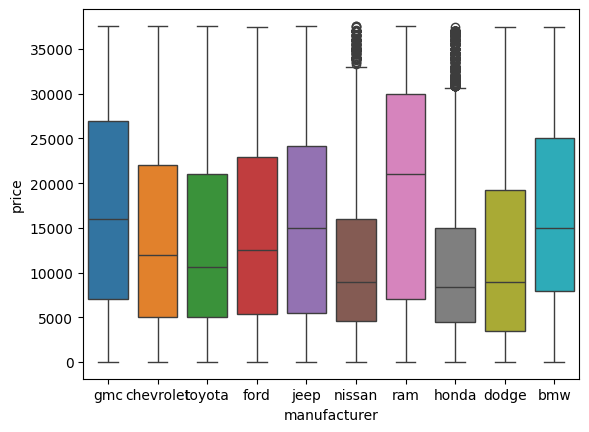

In [1282]:
sns.boxplot(data = df_no_high_cardinality.query("manufacturer == @top_ten").query("price < 37590"), x = "manufacturer", y = "price", hue = "manufacturer")

In [1283]:
df_top_ten = df_no_high_cardinality.query("manufacturer == @top_ten")
#df_top_ten = df_top_ten.drop(columns=['manufacturer']
df_top_ten.shape

(283134, 12)

Next lets analyze other columns with a low cardinality

In [1284]:
df_top_ten["condition"].value_counts()

condition
good         71808
excellent    68325
like new     14179
fair          4580
new            784
salvage        401
Name: count, dtype: int64

In [1285]:
# convert condition to int using one hot encoding
pd.get_dummies(df_top_ten["condition"]).astype("int")

,excellent,fair,good,like new,new,salvage
27,0,0,1,0,0,0
28,0,0,1,0,0,0
29,0,0,1,0,0,0
30,0,0,1,0,0,0
31,1,0,0,0,0,0
...,...,...,...,...,...,...
426857,0,0,1,0,0,0
426864,0,0,1,0,0,0
426868,1,0,0,0,0,0
426875,0,0,1,0,0,0


In [1286]:
df_cond = pd.concat([df_top_ten.drop("condition", axis=1), pd.get_dummies(df_top_ten["condition"]).astype(int)], axis=1)
df_cond

,price,year,manufacturer,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,excellent,fair,good,like new,new,salvage
27,33590,2014.000,gmc,8 cylinders,gas,57923.000,clean,other,3GTP1VEC4EG551563,NaN,pickup,0,0,1,0,0,0
28,22590,2010.000,chevrolet,8 cylinders,gas,71229.000,clean,other,1GCSCSE06AZ123805,NaN,pickup,0,0,1,0,0,0
29,39590,2020.000,chevrolet,8 cylinders,gas,19160.000,clean,other,3GCPWCED5LG130317,NaN,pickup,0,0,1,0,0,0
30,30990,2017.000,toyota,8 cylinders,gas,41124.000,clean,other,5TFRM5F17HX120972,NaN,pickup,0,0,1,0,0,0
31,15000,2013.000,ford,6 cylinders,gas,128000.000,clean,automatic,NaN,rwd,truck,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426857,41990,2019.000,toyota,6 cylinders,gas,36630.000,clean,other,JTEBU5JR6K5659628,4wd,SUV,0,0,1,0,0,0
426864,29590,2016.000,toyota,6 cylinders,gas,53475.000,clean,automatic,JTEZU5JR1G5145918,NaN,SUV,0,0,1,0,0,0
426868,0,2010.000,toyota,6 cylinders,gas,155000.000,clean,automatic,4T3BK3BB0AU043625,4wd,NaN,1,0,0,0,0,0
426875,23590,2019.000,nissan,6 cylinders,gas,32226.000,clean,other,1N4AA6AV6KC367801,fwd,sedan,0,0,1,0,0,0


In [1287]:
# remove text columns and replace with one hot encoded values for fuel, drive, type and transmission
df_cond = pd.concat([df_cond.drop("fuel", axis=1), pd.get_dummies(df_top_ten["fuel"]).astype(int)], axis=1)
df_cond = pd.concat([df_cond.drop("drive", axis=1), pd.get_dummies(df_top_ten["drive"]).astype(int)], axis=1)
df_cond = pd.concat([df_cond.drop("type", axis=1), pd.get_dummies(df_top_ten["type"]).astype(int)], axis=1)
df_cond = pd.concat([df_cond.drop("transmission", axis=1), pd.get_dummies(df_top_ten["transmission"]).astype(int)], axis=1)
df_cond

,price,year,manufacturer,cylinders,odometer,title_status,VIN,excellent,fair,good,...,offroad,other,pickup,sedan,truck,van,wagon,automatic,manual,other
27,33590,2014.000,gmc,8 cylinders,57923.000,clean,3GTP1VEC4EG551563,0,0,1,...,0,0,1,0,0,0,0,0,0,1
28,22590,2010.000,chevrolet,8 cylinders,71229.000,clean,1GCSCSE06AZ123805,0,0,1,...,0,0,1,0,0,0,0,0,0,1
29,39590,2020.000,chevrolet,8 cylinders,19160.000,clean,3GCPWCED5LG130317,0,0,1,...,0,0,1,0,0,0,0,0,0,1
30,30990,2017.000,toyota,8 cylinders,41124.000,clean,5TFRM5F17HX120972,0,0,1,...,0,0,1,0,0,0,0,0,0,1
31,15000,2013.000,ford,6 cylinders,128000.000,clean,NaN,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426857,41990,2019.000,toyota,6 cylinders,36630.000,clean,JTEBU5JR6K5659628,0,0,1,...,0,0,0,0,0,0,0,0,0,1
426864,29590,2016.000,toyota,6 cylinders,53475.000,clean,JTEZU5JR1G5145918,0,0,1,...,0,0,0,0,0,0,0,1,0,0
426868,0,2010.000,toyota,6 cylinders,155000.000,clean,4T3BK3BB0AU043625,1,0,0,...,0,0,0,0,0,0,0,1,0,0
426875,23590,2019.000,nissan,6 cylinders,32226.000,clean,1N4AA6AV6KC367801,0,0,1,...,0,0,0,1,0,0,0,0,0,1


Year doesn't mean anything but if we use this to calculate the car age, it will have some influence 

In [1288]:
df_cond["age"] = (2023 - df_cond["year"]).astype(int)
df_cond = df_cond.drop(columns=["year"])
df_cond

,price,manufacturer,cylinders,odometer,title_status,VIN,excellent,fair,good,like new,...,other,pickup,sedan,truck,van,wagon,automatic,manual,other,age
27,33590,gmc,8 cylinders,57923.000,clean,3GTP1VEC4EG551563,0,0,1,0,...,0,1,0,0,0,0,0,0,1,9
28,22590,chevrolet,8 cylinders,71229.000,clean,1GCSCSE06AZ123805,0,0,1,0,...,0,1,0,0,0,0,0,0,1,13
29,39590,chevrolet,8 cylinders,19160.000,clean,3GCPWCED5LG130317,0,0,1,0,...,0,1,0,0,0,0,0,0,1,3
30,30990,toyota,8 cylinders,41124.000,clean,5TFRM5F17HX120972,0,0,1,0,...,0,1,0,0,0,0,0,0,1,6
31,15000,ford,6 cylinders,128000.000,clean,NaN,1,0,0,0,...,0,0,0,1,0,0,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426857,41990,toyota,6 cylinders,36630.000,clean,JTEBU5JR6K5659628,0,0,1,0,...,0,0,0,0,0,0,0,0,1,4
426864,29590,toyota,6 cylinders,53475.000,clean,JTEZU5JR1G5145918,0,0,1,0,...,0,0,0,0,0,0,1,0,0,7
426868,0,toyota,6 cylinders,155000.000,clean,4T3BK3BB0AU043625,1,0,0,0,...,0,0,0,0,0,0,1,0,0,13
426875,23590,nissan,6 cylinders,32226.000,clean,1N4AA6AV6KC367801,0,0,1,0,...,0,0,1,0,0,0,0,0,1,4


In [1289]:
df_cond["cylinders"].value_counts()

cylinders
6 cylinders     62441
8 cylinders     60473
4 cylinders     46019
10 cylinders     1201
other             727
5 cylinders       299
3 cylinders       275
12 cylinders       33
Name: count, dtype: int64

In [1290]:
from sklearn.preprocessing import StandardScaler

# first convert the text to int
df_cond["cylinders"] = df_cond["cylinders"].str.replace(" cylinders", "", regex=False)
df_cond["cylinders"] = pd.to_numeric(df_cond["cylinders"], errors='coerce').fillna(0).astype(int)
df_cond.sample(5)

,price,manufacturer,cylinders,odometer,title_status,VIN,excellent,fair,good,like new,...,other,pickup,sedan,truck,van,wagon,automatic,manual,other,age
59428,21990,honda,0,20826.000,clean,3CZRU5H73KM709218,0,0,1,0,...,0,0,0,0,0,0,0,0,1,4
158518,11995,jeep,4,102689.000,clean,1C4NJPBAXGD603235,1,0,0,0,...,0,0,0,0,0,0,1,0,0,7
80844,15900,bmw,0,76436.000,NaN,5UXZV8C5XBL421030,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12
342532,6795,toyota,0,144932.000,clean,NaN,0,0,0,0,...,0,0,1,0,0,0,1,0,0,14
386828,17500,ford,6,118000.000,clean,NaN,1,0,0,0,...,0,0,0,1,0,0,1,0,0,6


In [1291]:
df_cond["title_status"].value_counts()

title_status
clean         268554
rebuilt         4858
salvage         2708
lien            1029
missing          481
parts only       107
Name: count, dtype: int64

In [1292]:
# for any rows missing title_status we will just replace with clean
df_cond["title_status"].fillna(df_cond["title_status"].mode()[0], inplace=True)

<Axes: xlabel='title_status', ylabel='price'>

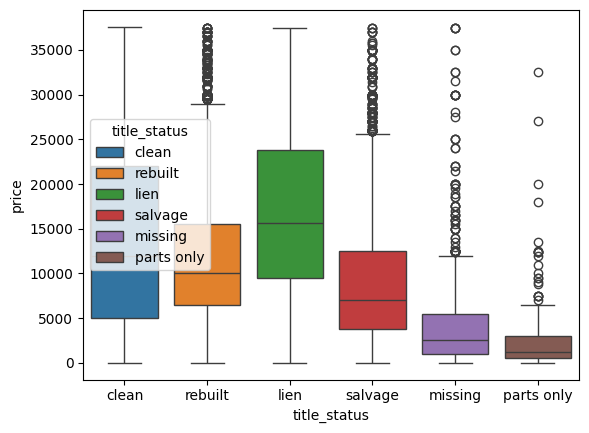

In [1293]:
sns.boxplot(data = df.query("price < 37590"), x = "title_status", y = "price", hue = "title_status")

In [1294]:
df_cond = pd.concat([df_cond.drop("title_status", axis=1), pd.get_dummies(df_cond["title_status"]).astype(int)], axis=1)
df_cond

,price,manufacturer,cylinders,odometer,VIN,excellent,fair,good,like new,new,...,automatic,manual,other,age,clean,lien,missing,parts only,rebuilt,salvage
27,33590,gmc,8,57923.000,3GTP1VEC4EG551563,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
28,22590,chevrolet,8,71229.000,1GCSCSE06AZ123805,0,0,1,0,0,...,0,0,1,13,1,0,0,0,0,0
29,39590,chevrolet,8,19160.000,3GCPWCED5LG130317,0,0,1,0,0,...,0,0,1,3,1,0,0,0,0,0
30,30990,toyota,8,41124.000,5TFRM5F17HX120972,0,0,1,0,0,...,0,0,1,6,1,0,0,0,0,0
31,15000,ford,6,128000.000,NaN,1,0,0,0,0,...,1,0,0,10,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426857,41990,toyota,6,36630.000,JTEBU5JR6K5659628,0,0,1,0,0,...,0,0,1,4,1,0,0,0,0,0
426864,29590,toyota,6,53475.000,JTEZU5JR1G5145918,0,0,1,0,0,...,1,0,0,7,1,0,0,0,0,0
426868,0,toyota,6,155000.000,4T3BK3BB0AU043625,1,0,0,0,0,...,1,0,0,13,1,0,0,0,0,0
426875,23590,nissan,6,32226.000,1N4AA6AV6KC367801,0,0,1,0,0,...,0,0,1,4,1,0,0,0,0,0


In [1295]:
# Step 3: Duplicate VIN numbers: VIN numbers are unique to a car, lets check for duplicates 
df_cond["VIN"].value_counts() 

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
3FAHP0HA2BR126641      1
1GNKRGKD2EJ336264      1
3GCUKNEC0HG154212      1
1ZVBP8AM8E5270282      1
1FDWF37P64EA24868      1
Name: count, Length: 78456, dtype: int64

In [1296]:
# check example to see
df_cond[df_cond["VIN"] == "5TFTX4CN3EX042751"]

,price,manufacturer,cylinders,odometer,VIN,excellent,fair,good,like new,new,...,automatic,manual,other,age,clean,lien,missing,parts only,rebuilt,salvage
41,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
284,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
1843,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
2163,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
2322,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417050,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
419362,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
420587,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0
423781,27990,toyota,0,17805.000,5TFTX4CN3EX042751,0,0,1,0,0,...,0,0,1,9,1,0,0,0,0,0


In [1297]:
# count the number of duplicates
num_vin_duplicates = int((df_cond["VIN"].value_counts() > 1).sum())
num_vin_duplicates

27021

In [1298]:
df_unique_vins = df_cond.drop_duplicates(subset='VIN')
print('Number of original car entries: ', len(df_cond))
print('Number of unique cars: ', len(df_unique_vins))
# now we can remove the VIN column
df_unique_vins = df_unique_vins.drop(columns=["VIN"])

Number of original car entries:  283134
Number of unique cars:  78457


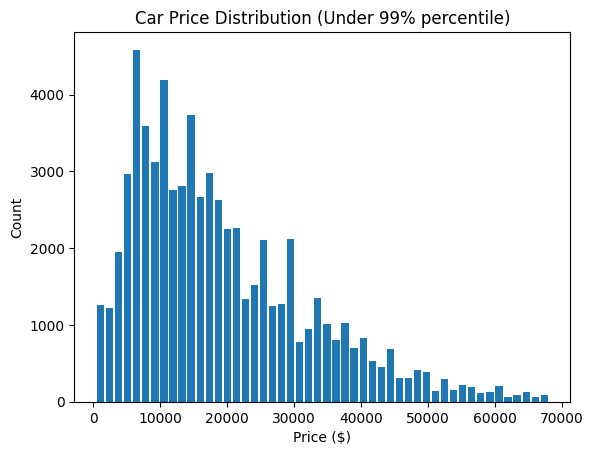

In [1299]:
# Step 4: Outlier detection: Check pricing using percentile and Z score and remove outliers

import matplotlib
from matplotlib import pyplot as plt

# plot only cars above the 13% interval and below 95% interval
plt.hist(df_unique_vins[(df_unique_vins["price"] > 425.000) & (df_unique_vins["price"] < 67999.000)]["price"], bins=50, rwidth=0.8)
plt.xlabel("Price ($)")     # X = Price
plt.ylabel("Count")         # Y = Frequency
plt.title("Car Price Distribution (Under 99% percentile)")
plt.show()

Car prices aren't normally distributed — they're skewed right because many used cars are cheaper and fewer cars are priced very high (luxury models). So the data naturally has a long tail on the right.
We want to transform this to a gaussian distribution using log transformation

In [1300]:
# based on the above at the 13% interval and 95% interval, create min and max thresholds
min_threshold, max_threshold = df_unique_vins["price"].quantile([0.13, 0.95])
print(min_threshold, max_threshold)

310.28000000000065 45991.0


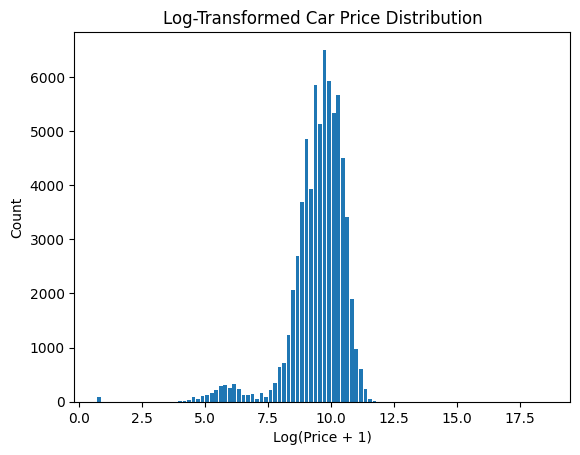

In [1301]:
df_unique_vins["price_log"] = np.log1p(df_unique_vins["price"]) # log(1 + price) to handle 0 values safely
df_unique_vins = df_unique_vins[df_unique_vins["price_log"] > 0]

plt.hist(df_unique_vins["price_log"], bins=100, rwidth=0.8)
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.title("Log-Transformed Car Price Distribution")

plt.show()

Now the distribution is normalized lets remove the outliers using direct std dev and z score

In [1302]:
upper_limit = df_unique_vins["price_log"].mean() + 3 * df_unique_vins["price_log"].std()
lower_limit = df_unique_vins["price_log"].mean() - 3 * df_unique_vins["price_log"].std()
df_no_outlier_std_dev = df_unique_vins[(df_unique_vins["price_log"] < upper_limit) & (df_unique_vins["price_log"] > lower_limit)]
df_no_outlier_std_dev.shape

(67465, 42)

In [1303]:
# create upper and lower limits based on 3 x std dev
df_unique_vins["zscore"] = (df_unique_vins["price_log"] - df_unique_vins["price_log"].mean()) / df_unique_vins["price_log"].std()
# remove price logs outside of 3 x std to the left and right 
df_no_outliers = df_unique_vins[(df_unique_vins["zscore"] >= -3) & (df_unique_vins["zscore"] <= 3)]
df_no_outliers.shape

(67465, 43)

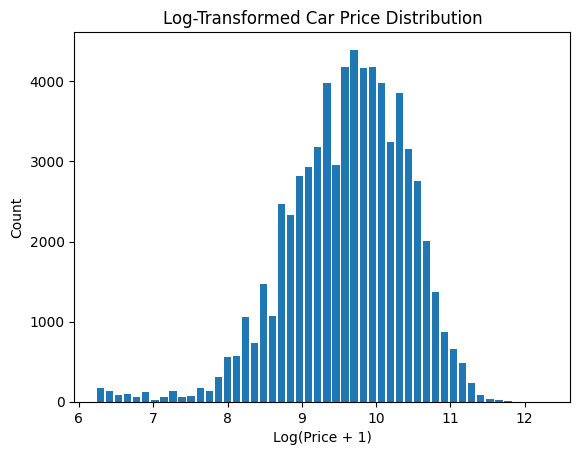

In [1304]:
# now lets look at the distribution
plt.hist(df_no_outliers["price_log"], bins=50, rwidth=0.8)
plt.xlabel("Log(Price + 1)")
plt.ylabel("Count")
plt.title("Log-Transformed Car Price Distribution")
plt.show()

Fianlly we need to one hot encode the manufacturer and our data set is ready

In [1305]:
final_df = pd.concat([df_no_outliers.drop("manufacturer", axis=1), pd.get_dummies(df_no_outliers["manufacturer"]).astype(int)], axis=1)
final_df

,price,cylinders,odometer,excellent,fair,good,like new,new,salvage,diesel,...,bmw,chevrolet,dodge,ford,gmc,honda,jeep,nissan,ram,toyota
27,33590,8,57923.000,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28,22590,8,71229.000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29,39590,8,19160.000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30,30990,8,41124.000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31,15000,6,128000.000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426660,24999,6,147540.000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426661,8999,4,105930.000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426665,34990,0,15113.000,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
426737,2500,4,185000.000,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [1306]:
# start by creating our X,y by removing price from the x columns and setting y to the price
X = final_df.drop(columns=["price"])
y = final_df["price"]

In [1307]:
# in our first approach we are simply going to try creating a linear regression model, and using a pipeline we will use a sequential feature selector to determine which features to use 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ["cylinders", "odometer"]),
])

lr = LinearRegression()
sfs = SequentialFeatureSelector(
    estimator=lr,
    n_features_to_select="auto",
    direction='forward' 
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("sfs", sfs),
    ("regressor", LinearRegression())
])

pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = np.sqrt(mean_squared_error(y_train, train_preds))
test_mse = np.sqrt(mean_squared_error(y_test, test_preds))
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Train MSE: 13438.49
Test MSE: 14363.86
Train MAE: 9716.26
Test MAE: 9726.01


In [1308]:
# in our second approach we will use grid search CV to test a range of regression models, we will also be adding some hyper parameter tuning with Ridge and Lasso by passing in different values of alpha 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1, 10]}),
    "Lasso": (Lasso(), {"alpha": [0.01, 0.1, 1]})
}

results = {}

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")
    
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mse)
    
    results[name] = {
        "Best Params": grid.best_params_,
        "Test RMSE": rmse,
        "Test MAE": mae,
        "Model": best_model
    }
    
    print(f"Best Params: {grid.best_params_}")
    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test MAE: {mae:.2f}")


Training Linear...
Best Params: {}
Test RMSE: 6475.49
Test MAE: 4113.52

Training Ridge...
Best Params: {'alpha': 10}
Test RMSE: 6475.55
Test MAE: 4113.61

Training Lasso...
Best Params: {'alpha': 0.01}
Test RMSE: 6475.48
Test MAE: 4113.50


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The best-performing model was using linear regression without any hyperparameter tuning. On average, predictions were off by approximately **\$6,475** (RMSE) or **\$4,113** (MAE). This is still substantial, we are now going to try an alternative approach by using  percentiles instead of z score.

In [1467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      426880 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [1481]:
# start by removing size, id, paint color, and location information
new_df = df.drop(columns=['region', 'size', 'id', 'state', 'paint_color'])
new_df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type
103642,0,2014.000,NaN,ALL MAKES & MODELS,NaN,NaN,gas,80000.000,clean,automatic,NaN,NaN,NaN
55149,338,2014.000,chevrolet,silverado 1500 work t,NaN,6 cylinders,gas,109368.000,clean,automatic,1GCRCPEH9EZ378858,rwd,NaN
330683,4950,2006.000,hyundai,elantra,excellent,NaN,gas,100427.000,clean,automatic,KMHDN46D26U340283,fwd,sedan
223284,0,2016.000,chevrolet,tahoe,excellent,8 cylinders,gas,119752.000,clean,automatic,1GNSKBKC5GR282395,4wd,SUV
22840,16990,2015.000,mini,hardtop 2 door cooper s,good,NaN,other,30273.000,clean,other,WMWXP7C51F2A37761,NaN,hatchback


In [1482]:
numeric_cols = new_df.select_dtypes(include=['number']).columns
categorical_cols = new_df.select_dtypes(include=['object', 'category']).columns

print(numeric_cols)
print(categorical_cols)

Index(['price', 'year', 'odometer'], dtype='object')
Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'type'],
      dtype='object')


In [1483]:
# we are also going to drop any rows that have null numerical values
# drop row that have null numeric cols 
new_df = new_df.dropna(subset=numeric_cols)
new_df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type
145964,37977,2018.000,ford,f-150,NaN,8 cylinders,gas,55260.000,clean,automatic,1FTFW1E50JKC56602,4wd,pickup
404624,20299,2021.000,mitsubishi,mirage g4 se,NaN,3 cylinders,gas,6.000,clean,automatic,ML32FVFJXMHF01706,fwd,sedan
147993,0,2018.000,NaN,genesis g80 3.8,excellent,6 cylinders,gas,50000.000,clean,automatic,NaN,4wd,sedan
147684,7500,2011.000,gmc,acadia awd,excellent,4 cylinders,gas,100000.000,clean,automatic,NaN,4wd,SUV
334913,9500,2014.000,ford,NaN,NaN,NaN,gas,208000.000,clean,automatic,NaN,NaN,NaN


In [1484]:
new_df["age"] = (2023 - new_df["year"]).astype(int)
new_df = new_df.drop(columns=["year"])
numeric_cols = numeric_cols.drop('year')
numeric_cols = numeric_cols.append(pd.Index(['age']))
new_df

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,age
27,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.000,clean,other,3GTP1VEC4EG551563,NaN,pickup,9
28,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.000,clean,other,1GCSCSE06AZ123805,NaN,pickup,13
29,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.000,clean,other,3GCPWCED5LG130317,NaN,pickup,3
30,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.000,clean,other,5TFRM5F17HX120972,NaN,pickup,6
31,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.000,clean,automatic,NaN,rwd,truck,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000,clean,other,1N4AA6AV6KC367801,fwd,sedan,4
426876,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.000,clean,other,7JR102FKXLG042696,fwd,sedan,3
426877,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.000,clean,other,1GYFZFR46LF088296,NaN,hatchback,3
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000,clean,other,58ABK1GG4JU103853,fwd,sedan,5


In [1485]:
new_df["price"].describe([0.0, 0.05, 0.1, 0.13, 0.2, 0.80, 0.85, 0.90, 0.95, 0.99]).round(2)

count       425675.000
mean         75305.640
std       12199512.600
min              0.000
0%               0.000
5%               0.000
10%            500.000
13%           2250.000
20%           4500.000
50%          13900.000
80%          29590.000
85%          32990.000
90%          37337.600
95%          43998.000
99%          66882.080
max     3736928711.000
Name: price, dtype: float64

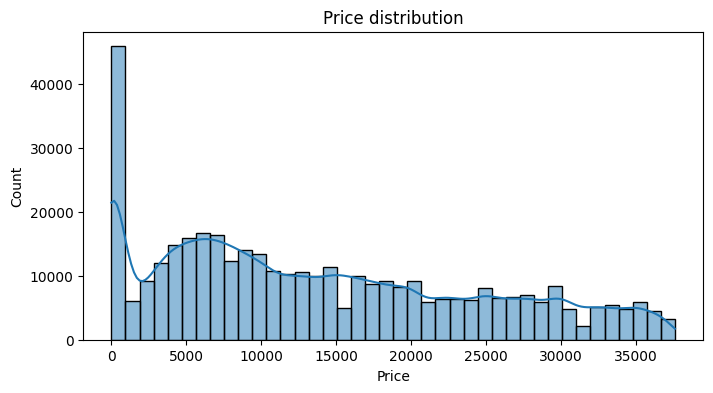

In [1486]:
# data distribution for price col
plt.figure(figsize=(8, 4))
sns.histplot(new_df[new_df['price'] < 37590.000]['price'], bins=40, kde=True)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

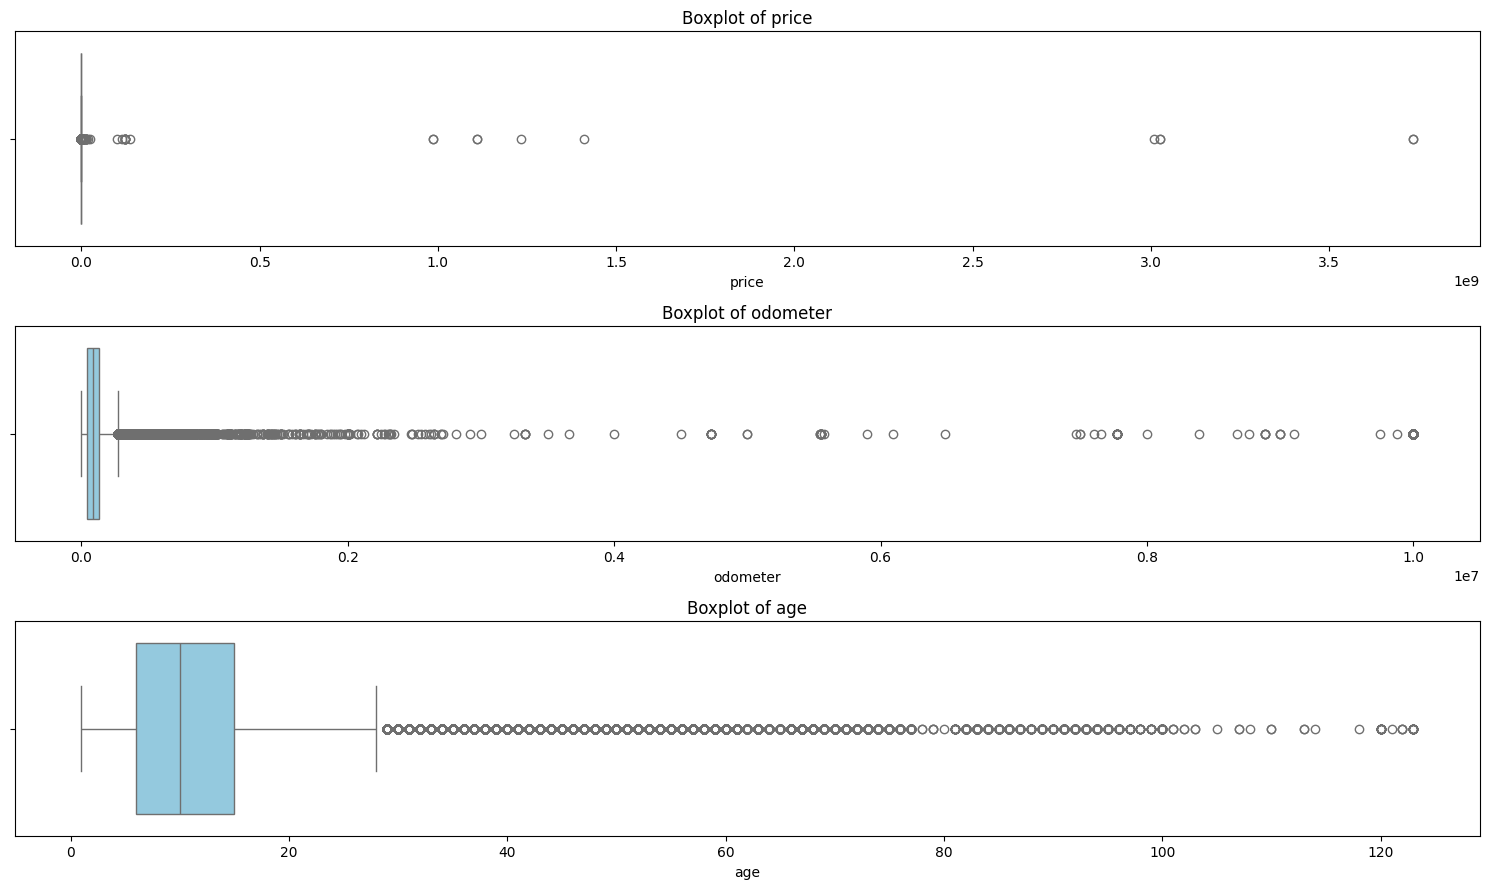

In [1487]:
# check for outliers using box plots
plt.figure(figsize=(15, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x = new_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    
plt.show()

In [1488]:
# drop data where pice < 2000
new_df_updated = new_df[new_df['price'] > 2000]

# handling outliers
for col in numeric_cols:
    Q1 = new_df_updated[col].quantile(0.25)
    Q3 = new_df_updated[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep rows where value is within the IQR bounds or is NaN
    new_df_updated = new_df_updated[(new_df_updated[col].isna()) | ((new_df_updated[col] >= lower_bound) & (new_df_updated[col] <= upper_bound))]

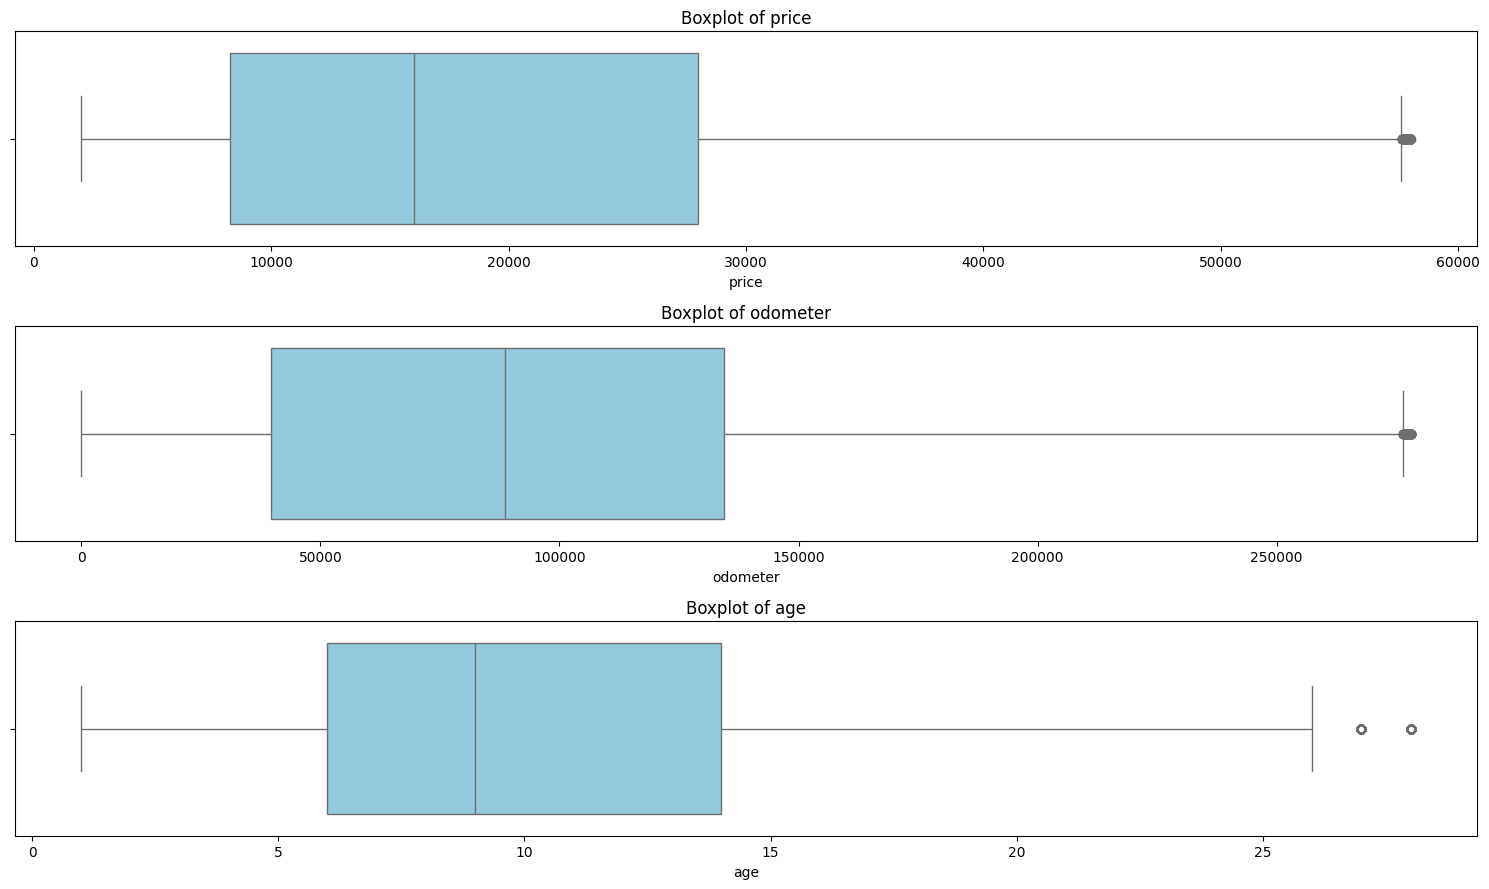

In [1489]:
# check for outliers
plt.figure(figsize=(15, len(numeric_cols)*3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=new_df_updated[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    
plt.show()

In [1490]:
new_df_updated['odometer'] = new_df_updated['odometer'].astype(int)

In [1491]:
new_df_updated.isnull().sum()

price                0
manufacturer      9884
model             2698
condition       130069
cylinders       143331
fuel              2271
odometer             0
title_status      5968
transmission      1649
VIN             123734
drive           104073
type             69748
age                  0
dtype: int64

In [1492]:
new_df_updated_unique_vins = new_df_updated.drop_duplicates(subset='VIN')
print('Number of original car entries: ', len(new_df_updated))
print('Number of unique cars: ', len(new_df_updated_unique_vins))
# now we can remove the VIN column
new_df_updated_unique_vins = new_df_updated_unique_vins.drop(columns=["VIN"])

Number of original car entries:  347071
Number of unique cars:  96323


In [1493]:
# use ordinal encoding for condition
condition_order = {
    'salvage': 1,
    'fair': 2, 
    'good': 3, 
    'excellent': 4,
    'like new': 5, 
    'new': 6 
}

new_df_updated_unique_vins['condition'] = new_df_updated_unique_vins['condition'].map(condition_order)
new_df_updated_unique_vins['condition'] = new_df_updated_unique_vins['condition'].fillna(0)
new_df_updated_unique_vins

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,age
27,33590,gmc,sierra 1500 crew cab slt,3.000,8 cylinders,gas,57923,clean,other,NaN,pickup,9
28,22590,chevrolet,silverado 1500,3.000,8 cylinders,gas,71229,clean,other,NaN,pickup,13
29,39590,chevrolet,silverado 1500 crew,3.000,8 cylinders,gas,19160,clean,other,NaN,pickup,3
30,30990,toyota,tundra double cab sr,3.000,8 cylinders,gas,41124,clean,other,NaN,pickup,6
31,15000,ford,f-150 xlt,4.000,6 cylinders,gas,128000,clean,automatic,rwd,truck,10
...,...,...,...,...,...,...,...,...,...,...,...,...
426682,17873,NaN,Thunder Creek Fuel Trailer MT2,0.000,NaN,NaN,501,clean,NaN,NaN,other,5
426727,4500,chrysler,pacifica,0.000,6 cylinders,gas,163837,clean,automatic,NaN,wagon,17
426737,2500,honda,civic,3.000,4 cylinders,gas,185000,clean,manual,fwd,sedan,18
426746,17950,ford,f350 super duty,4.000,8 cylinders,diesel,186000,clean,automatic,4wd,other,19


In [1494]:
# update cylinders to int values like previously
new_df_updated_unique_vins["cylinders"] = new_df_updated_unique_vins["cylinders"].str.replace(" cylinders", "", regex=False)
new_df_updated_unique_vins["cylinders"] = pd.to_numeric(new_df_updated_unique_vins["cylinders"], errors='coerce').fillna(0).astype(int)
new_df_updated_unique_vins

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,age
27,33590,gmc,sierra 1500 crew cab slt,3.000,8,gas,57923,clean,other,NaN,pickup,9
28,22590,chevrolet,silverado 1500,3.000,8,gas,71229,clean,other,NaN,pickup,13
29,39590,chevrolet,silverado 1500 crew,3.000,8,gas,19160,clean,other,NaN,pickup,3
30,30990,toyota,tundra double cab sr,3.000,8,gas,41124,clean,other,NaN,pickup,6
31,15000,ford,f-150 xlt,4.000,6,gas,128000,clean,automatic,rwd,truck,10
...,...,...,...,...,...,...,...,...,...,...,...,...
426682,17873,NaN,Thunder Creek Fuel Trailer MT2,0.000,0,NaN,501,clean,NaN,NaN,other,5
426727,4500,chrysler,pacifica,0.000,6,gas,163837,clean,automatic,NaN,wagon,17
426737,2500,honda,civic,3.000,4,gas,185000,clean,manual,fwd,sedan,18
426746,17950,ford,f350 super duty,4.000,8,diesel,186000,clean,automatic,4wd,other,19


In [1496]:
numeric_cols = new_df_updated_unique_vins.select_dtypes(include='number').columns
categorical_cols = new_df_updated_unique_vins.select_dtypes(include=['object', 'category']).columns

print(numeric_cols)
print(categorical_cols)

Index(['price', 'condition', 'cylinders', 'odometer', 'age'], dtype='object')
Index(['manufacturer', 'model', 'fuel', 'title_status', 'transmission',
       'drive', 'type'],
      dtype='object')


Since the linear regression model was the most accurate we will now proceed with our first approach using feature selection only this time we will add an additional column transofmration step to one hot encode the rema

In [1513]:
from sklearn.preprocessing import OneHotEncoder

X = new_df_updated_unique_vins.drop(columns=["price"])
y = new_df_updated_unique_vins["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_cols = ['condition', 'cylinders', 'odometer', 'age']
cat_cols = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission',
       'drive', 'type']
transformer = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

pipe = Pipeline([
    ("transformer", transformer),
    ("regressor", LinearRegression())
])

pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = np.sqrt(mean_squared_error(y_train, train_preds))
test_mse = np.sqrt(mean_squared_error(y_test, test_preds))
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train MAE: {train_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Train MSE: 4084.69
Test MSE: 5191.95
Train MAE: 2695.39
Test MAE: 3571.45


We now observe a substantial improvement in the linear regression model, with predictions off by approximately **\$5,191.95** (RMSE) and **\$3,571.45** (MAE). This represents a significant enhancement compared to the previous results.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

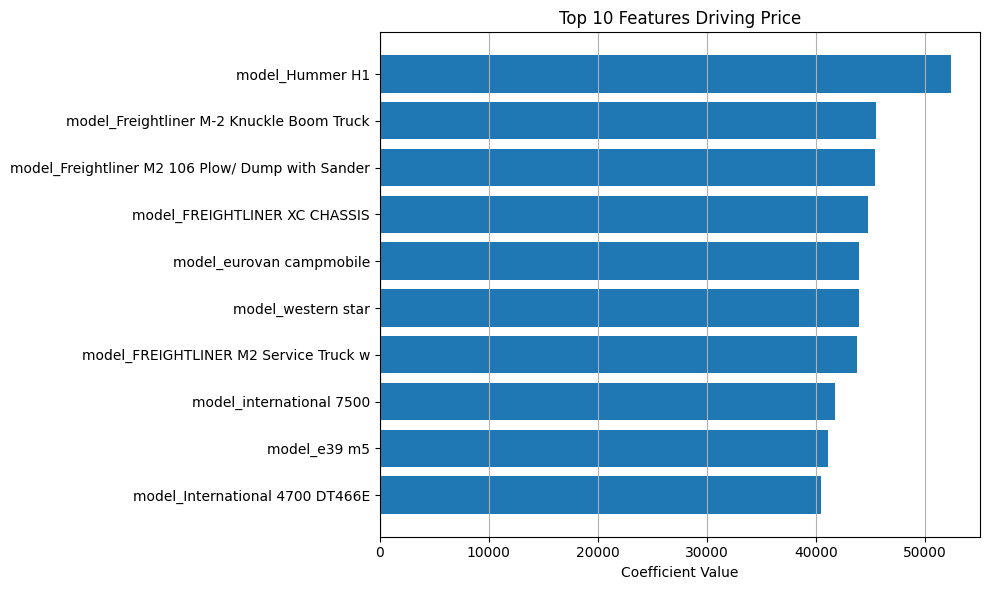

In [1514]:
# First let's get the feature names from the 
ohe = pipe.named_steps['transformer'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = num_cols + list(ohe_feature_names)

# get coefficients
coefs = pipe.named_steps['regressor'].coef_

# Now plot the top 10 most influential features
feat_importance = pd.DataFrame({
    "Feature": all_feature_names,
    "Coefficient": coefs
})
feat_importance["AbsCoefficient"] = feat_importance["Coefficient"].abs()
top_features = feat_importance.sort_values(by="AbsCoefficient", ascending=False).head(10)

# Step 10: Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Coefficient"])
plt.gca().invert_yaxis()
plt.axvline(0, color='gray', linestyle='--')
plt.title("Top 10 Features Driving Price")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.grid(axis='x')
plt.show()

# Used Car Price Analysis: Final Report

## Objective

Our objective was to analyze a large dataset of used cars to identify which factors most strongly influence vehicle pricing. This insight will allow dealers to better prioritize inventory selection and pricing strategies.

## Data Preparation 

We cleaned and prepared the dataset by:
- Removing duplicate and invalid VINs
- Engineering new features such as vehicle age
- Handling missing values (e.g., replacing unknown conditions)
- Encoding categorical data using one-hot encoding
- Scaling numerical features (e.g., odometer, cylinders)

We trained several regression models, including:
- Linear Regression
- Ridge Regression
- Lasso Regression

The best-performing model (Linear Regression with preprocessing) achieved:
- Test RMSE: **\$5,191.95**
- Test MAE:  **\$3,571.45**

These metrics indicate that on average, our model’s predictions are within approximately $3.5K–$5.1K of the actual price.

## Key Insights: Top Features Driving Price

The chart above highlights the top 10 vehicle model features that have the strongest positive impact on price based on the Linear Regression model:

- High-value models include specialized and rare vehicles such as the Hummer H1, Freightliner service and dump trucks, and the BMW e39 M5.
- These models have coefficients in the range of $40K–$52K, suggesting they are strong drivers of higher vehicle prices.
- Features such as model, fuel type, and vehicle condition are major contributors.

## Recommendations

1. **Focus Inventory on High-Value Models**  
   Models like Hummer H1 and Freightliner trucks consistently drive higher prices. Stocking and marketing these may yield better returns.

2. **Maintain and Highlight Vehicle Condition**  
   Vehicles marked as “excellent” or “like new” are strong indicators of higher price. Consider emphasizing these in listings and vehicle prep.

3. **Explore Niche Segments**  
   Specialty vehicles, even if less frequent, appear to command significantly higher prices. Consider tapping into these segments.

4. **Continue Data-Driven Strategy**  
   With ongoing data collection and refinement, this model can be updated periodically to reflect market changes.

## Next Steps

- Deploy this model into a simple dashboard to guide inventory purchasing decisions.
- Periodically update the model to reflect changes
